# Network Analysis of RDF Graphs

In this notebook we provide basic facilities for performing network analyses of RDF graphs easily with Python [rdflib](https://github.com/RDFLib/rdflib) and [networkx](https://networkx.github.io/)

We do this in 4 steps:
1. Load an arbitrary RDF graph into rdflib
2. Get a subgraph of relevance (optional)
3. Convert the rdflib Graph into an networkx Graph, as shown [here](https://github.com/RDFLib/rdflib/blob/master/rdflib/extras/external_graph_libs.py)
4. Get an network analysis report by running networkx's algorithms on that data structure

In [22]:
# Install required packages in the current Jupyter kernel
# Uncomment the following lines if you need to install these libraries
# If you run into permission issues, try with the --user option
import sys
# !pip install -q rdflib networkx matplotlib
# !{sys.executable} -m pip install rdflib networkx matplotlib --user
##!pip install rdflib
# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

## 1. Loading RDF

The first thing to do is to load the RDF graph we want to perform the network analysis on. By executing the next cell, we'll be asked to fill in the path to an RDF graph. This can be any path, local or online, that we can look up.

Any of the Turtle (`ttl.`) files that we include with this notebook will do; for example, `bsbm-sample.ttl`.
But any Web location that leads to an RDF file (for example, the GitHub copy of that same file at https://raw.githubusercontent.com/albertmeronyo/rdf-network-analysis/master/bsbm-sample.ttl; or any other RDF file on the Web like https://raw.githubusercontent.com/albertmeronyo/lodapi/master/ghostbusters.ttl) will work too.

In [13]:
# RDF graph loading
#https://raw.githubusercontent.com/albertmeronyo/lodapi/master/ghostbusters.ttl
path = input("Path or URI of the RDF graph to load: ")
rg = RDFGraph()
rg.parse(path, format='ttl')
print("rdflib Graph loaded successfully with {} triples".format(len(rg)))

Path or URI of the RDF graph to load: https://raw.githubusercontent.com/albertmeronyo/lodapi/master/ghostbusters.ttl
rdflib Graph loaded successfully with 52340 triples


## 2. Get a subgraph out of the loaded RDF graph (optional)

This cell can be skipped altogether without affecting the rest of the notebook; but it will be useful if instead of using the whole RDF grahp of the previous step, we just want to use a subgraph that's included in it.

By executing the next cell, we'll be asked two things:

- The URI of the ''entiy'' type we are interested in (e.g. `http://dbpedia.org/ontology/Band`)
- The URI of the ''relation'' connecting entities we are interested in (e.g. `http://dbpedia.org/ontology/influencedBy`)

Using these two, the notebook will replace the original graph with the subgraph that's constructed by those entity types and relations only.

In [1]:
"""entity = input("Entity type to build nodes of the subgraph with: ")
relation = input("Relation type to build edges of the subgraph with: ")

# TODO: Use entity and relation as parameters of a CONSTRUCT query
query = """
PREFIX bsbm: <http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/>
CONSTRUCT {{ ?u a {} . ?u {} ?v }} WHERE {{ ?u a {} . ?u {} ?v }}""".format(entity, relation, entity, relation)
#print(query)
subg = rg.query(query)

rg = subg"""# Subgraph construction (optional)


SyntaxError: invalid syntax (<ipython-input-1-3d2a6f5dbd20>, line 6)

## 3. Converting rdflib.Graph to networkx.Graph

Thanks to [the great work done by the rdflib developers](https://github.com/RDFLib/rdflib/blob/master/rdflib/extras/external_graph_libs.py) this step, which converts the basic graph data structure of rdflib into its equivalent in networkx, is straightforward. Just run the next cell to make our RDF dataset ready for network analysis!

In [14]:
# Conversion of rdflib.Graph to networkx.Graph
G = rdflib_to_networkx_graph(rg)
print("networkx Graph loaded successfully with length {}".format(len(G)))

networkx Graph loaded successfully with length 9012


NETWORK SIZE
The network has 9012 nodes and 50030 edges

PENDANTS
The network has 61 pendants

DENSITY
The network density is 0.0012321577863382738

DEGREE CENTRALITY
The mean degree centrality is 0.0012321577863380999, with stdev 0.015118593860648264
The maximum node is http://example.org/midi/NoteOnEvent, with value 0.8997891465986018
The minimum node is http://example.org/midi/programs/78, with value 0.00011097547442015315
(0.8997891465986018, 0.6549772500277439, 0.47075796249028967, 0.354344689823549, 0.3527910331816669, 0.278992342692265, 0.2653423593385862, 0.18654977250027743, 0.18610587060259684, 0.157252247253357, 0.14116080346243481, 0.1283986239041172, 0.12473643324825213, 0.11574741982021973, 0.1056486516479858, 0.10276328931306182, 0.06325602041948729, 0.05970480523804239, 0.05659749195427811, 0.05426700699145489, 0.04771945400066585, 0.046387748307624016, 0.0459438464099434, 0.03662190655865054, 0.03373654422372656, 0.030851181888802575, 0.029741427144601044, 0.0248585062

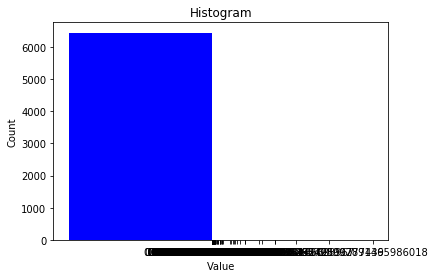

In [7]:
# Analysis

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants


def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)
    for i,m in degreeCount:
        print(i,m)
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G)))
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
histogram(dc)
print()

# Eigenvector centrality -- mean and stdev


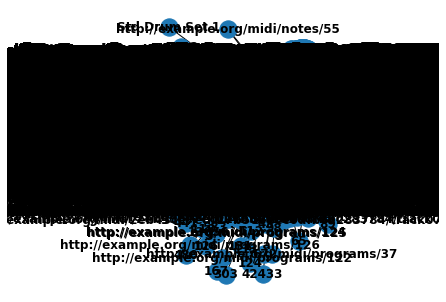

In [11]:
nx.draw(G, with_labels=True, font_weight='bold')